<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler

# import pandas_profiling

## Исследование задачи

In [18]:
pth1 = '/datasets/Churn.csv'
pth2 = 'Churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Check the file path')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [20]:
df.shape

(10000, 14)

#### Признаки
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

#### Целевой признак
- `Exited` — факт ухода клиента

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [75]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [23]:
df.duplicated().sum()

0

- Содержание таблицы соответствует описанию, пропуски есть в колонке `Tenure`, дубликаты отсутствуют

### Предобработка
#### Заполнение пропусков, масштабирование, кодирование, разделение 

<div class="alert alert-info">
<b> Комментарий студента</b>
    
Я произвожу масштабирование на всех доступных данных, до разделения исходной выборки на несколько частей. В общем случае это плохая практика: тренды в данных могут "замылиться" и поэтому обучать `scaler` нужно на тренировочной выборке, а на тестовой только применять. Однако, в текущей задаче у нас нет информации о динамике (нет временных отметок), поэтому масштабирование можно производить сразу на всех данных.

Это корректный подход?
</div>

In [59]:
# Fill the missing values with the median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

# Target variable
target = df['Exited']

# Exclude not only the target but also row and customer ID columns
# as they are not needed for the model
features = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

# Scaling numerical features
numeric_columns = features.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# Avoiding the dummy variable trap
features_ohe = pd.get_dummies(features, drop_first=True)

# Split the initial sample (60% for training, 40% for testing and validation)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ohe, target, test_size=.4, random_state=42
)

# Split the validation sample (50% for validation, 50% for testing)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=.5, random_state=42
)

In [60]:
# Test the split
print(f'Обучающая выборка содержит {len(features_train) / len(df):.0%} исходных данных')
print(f'Валидационная выборка содержит {len(features_valid) / len(df):.0%} исходных данных')
print(f'Тестовая выборка содержит {len(features_test) / len(df):.0%} исходных данных')

Обучающая выборка содержит 60% исходных данных
Валидационная выборка содержит 20% исходных данных
Тестовая выборка содержит 20% исходных данных


#### Обучение без учета дисбаланса

##### _Решающее дерево_

_Решающее дерево_

In [93]:
best_dt_model = None
best_dt_score = 0

print('decision tree f1 score')
print()
print('train | valid |  depth')
print('-----------------------')
for depth in range(2, 20):

    # Create a decision tree model
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    predictions_train_dt = model_dt.predict(features_train)

    # Calculate the f1 score
    f1_valid_dt = f1_score(target_valid, predictions_valid_dt)
    f1_train_dt = f1_score(target_train, predictions_train_dt)
    print(f' {f1_train_dt:.0%}  |  {f1_valid_dt:.0%}  |  {depth}')

    if f1_valid_dt > best_dt_score:
        best_dt_model = model_dt
        best_dt_score = f1_valid_dt
        best_depth = depth

print()
print('*' * 10)
print(f'best dt valid accuracy: {best_dt_score:.0%}, best depth: {best_depth}')
print('*' * 10)

decision tree f1 score

train | valid |  depth
-----------------------
 51%  |  47%  |  2
 54%  |  50%  |  3
 51%  |  47%  |  4
 58%  |  51%  |  5
 61%  |  52%  |  6
 65%  |  51%  |  7
 68%  |  52%  |  8
 71%  |  51%  |  9
 75%  |  49%  |  10
 80%  |  49%  |  11
 84%  |  45%  |  12
 88%  |  46%  |  13
 91%  |  45%  |  14
 94%  |  45%  |  15
 96%  |  46%  |  16
 98%  |  45%  |  17
 98%  |  45%  |  18
 99%  |  45%  |  19

**********
best dt valid accuracy: 52%, best depth: 6
**********


##### _Случайный лес_

In [102]:
best_rf_model = None
best_rf_score = 0

print('random forest score')
print()
print('train | valid | n est')
print('-----------------------')
for est in range(1, 101):

    # Create a random forest model
    model_rf = RandomForestClassifier(n_estimators=est, random_state=42)
    model_rf.fit(features_train, target_train)
    predictions_valid_rf = model_rf.predict(features_valid)
    predictions_train_rf = model_rf.predict(features_train)

    # Calculate the f1 score
    f1_valid_rf = f1_score(target_valid, predictions_valid_rf)
    f1_train_rf = f1_score(target_train, predictions_train_rf)
    print(f' {f1_train_rf:.0%}  |  {f1_valid_rf:.0%}  |  {est}')

    if f1_valid_rf > best_rf_score:
        best_rf_model = model_rf
        best_rf_score = f1_valid_rf
        best_n_est = est

print()
print('*' * 10)
print(f'best rf valid accuracy: {best_rf_score:.0%}, best n est: {best_n_est}')
print('*' * 10)

random forest score

train | valid | n est
-----------------------
 82%  |  46%  |  1
 80%  |  41%  |  2
 92%  |  45%  |  3
 90%  |  46%  |  4
 95%  |  49%  |  5
 93%  |  48%  |  6
 97%  |  51%  |  7
 95%  |  50%  |  8
 97%  |  53%  |  9
 96%  |  52%  |  10
 98%  |  53%  |  11
 97%  |  53%  |  12
 98%  |  55%  |  13
 98%  |  54%  |  14
 99%  |  54%  |  15
 98%  |  53%  |  16
 99%  |  55%  |  17
 99%  |  53%  |  18
 99%  |  54%  |  19
 98%  |  53%  |  20
 99%  |  54%  |  21
 99%  |  54%  |  22
 99%  |  55%  |  23
 99%  |  55%  |  24
 99%  |  55%  |  25
 99%  |  55%  |  26
 99%  |  55%  |  27
 99%  |  55%  |  28
 99%  |  54%  |  29
 99%  |  54%  |  30
 100%  |  55%  |  31
 99%  |  54%  |  32
 100%  |  55%  |  33
 99%  |  55%  |  34
 100%  |  55%  |  35
 100%  |  54%  |  36
 100%  |  55%  |  37
 100%  |  55%  |  38
 100%  |  55%  |  39
 100%  |  54%  |  40
 100%  |  55%  |  41
 100%  |  54%  |  42
 100%  |  54%  |  43
 100%  |  54%  |  44
 100%  |  55%  |  45
 100%  |  55%  |  46
 100%  |

##### _Логистическая регрессия_

In [76]:
lr_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

# Train the model
lr_model.fit(features_train, target_train)
lr_predictions_valid = lr_model.predict(features_valid)
lr_predictions_train = lr_model.predict(features_train)

# Calculate the f1 score
lr_f1_valid = f1_score(target_valid, lr_predictions_valid)
lr_f1_train = f1_score(target_train, lr_predictions_train)


print('logistic regression f1 score')
print()
print('*' * 10)
print(f'train {lr_f1_train:.2%}, valid {lr_f1_valid:.2%}')
print('*' * 10)

logistic regression f1 score

**********
train 32.51%, valid 29.94%
**********


- Из рассмотренных алгоритмов случайный лес выглядит перспективнее остальных

## Борьба с дисбалансом

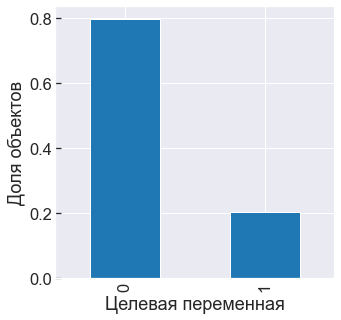

In [53]:
plt.figure(figsize=(5, 5))

target_train.value_counts(normalize=True).plot(kind='bar')

plt.ylabel('Доля объектов')
plt.xlabel('Целевая переменная')

plt.show()

In [82]:
# Weightec classes
lr_model = LogisticRegression(random_state=42, solver='lbfgs',
                              max_iter=1000, class_weight='balanced')

# Train the model
lr_model.fit(features_train, target_train)
lr_predictions_valid = lr_model.predict(features_valid)
lr_predictions_train = lr_model.predict(features_train)

# Calculate the f1 score
lr_f1_valid = f1_score(target_valid, lr_predictions_valid)
lr_f1_train = f1_score(target_train, lr_predictions_train)


print('logistic regression (balanced) f1 score')
print()
print('*' * 10)
print(f'train {lr_f1_train:.2%}, valid {lr_f1_valid:.2%}')
print('*' * 10)

logistic regression (balanced) f1 score

**********
train 50.06%, valid 46.14%
**********


In [116]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [126]:
best_lr_model_upsample = None
best_lr_score = 0

print('logistic regression (upsample mode) f1 score')
print()

for coefficient in range(1, 11):

    features_upsampled, target_upsampled = upsample(features_train, target_train, coefficient)

    lr_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

    # Train the model using upsampled data
    lr_model.fit(features_upsampled, target_upsampled)
    lr_predictions_valid = lr_model.predict(features_valid)
    lr_predictions_train = lr_model.predict(features_upsampled)

    # Calculate the f1 score
    f1_valid_lr = f1_score(target_valid, lr_predictions_valid)
    f1_train_lr = f1_score(target_upsampled, lr_predictions_train)

    if f1_valid_lr > best_lr_score:
        best_lr_model_upsample = lr_model
        best_lr_score = f1_valid_lr
        best_coefficient = coefficient

    # print('*' * 10)
    print(f'repeat coefficient: {coefficient}')
    print(f'train {f1_train_lr:.2%}, valid {f1_valid_lr:.2%}')
    print()

print()
print('*' * 10)
print(f'best rf valid score: {best_lr_score:.2%}, best repeat: {best_coefficient}')
print('*' * 10)

logistic regression (upsample mode) f1 score

repeat coefficient: 1
train 32.51%, valid 29.94%

repeat coefficient: 2
train 53.76%, valid 44.23%

repeat coefficient: 3
train 63.80%, valid 46.90%

repeat coefficient: 4
train 71.21%, valid 46.38%

repeat coefficient: 5
train 75.84%, valid 44.71%

repeat coefficient: 6
train 78.51%, valid 42.79%

repeat coefficient: 7
train 80.35%, valid 41.63%

repeat coefficient: 8
train 82.25%, valid 39.79%

repeat coefficient: 9
train 83.27%, valid 39.02%

repeat coefficient: 10
train 84.29%, valid 38.33%


**********
best rf valid score: 46.90%, best repeat: 3
**********


In [133]:
best_rf_upcample_model = None
best_rf_score = 0

print('random forest score (upsampling mode)')
print()
print('train | valid | repeat')
print('-----------------------')
for coefficient in range(1, 11):

    features_upsampled, target_upsampled = upsample(features_train, target_train, coefficient)
    # Create a random forest model using upsampled data
    # n_estimators was tuned earlier
    model_rf = RandomForestClassifier(n_estimators=77, random_state=42)
    model_rf.fit(features_upsampled, target_upsampled)
    predictions_valid_rf = model_rf.predict(features_valid)
    predictions_train_rf = model_rf.predict(features_train)

    # Calculate the f1 score
    f1_valid_rf = f1_score(target_valid, predictions_valid_rf)
    f1_train_rf = f1_score(target_train, predictions_train_rf)
    print(f' {f1_train_rf:.0%}  |  {f1_valid_rf:.0%}  |  {coefficient}')

    if f1_valid_rf > best_rf_score:
        best_rf_upcample_model = model_rf
        best_rf_score = f1_valid_rf
        best_coefficient = coefficient

print()
print('*' * 10)
print(f'best rf valid accuracy: {best_rf_score:.2%}, best repeat: {best_coefficient}')
print('*' * 10)

random forest score (upsampling mode)

train | valid | repeat
-----------------------
 100%  |  56%  |  1
 100%  |  58%  |  2
 100%  |  56%  |  3
 100%  |  55%  |  4
 100%  |  55%  |  5
 100%  |  54%  |  6
 100%  |  56%  |  7
 100%  |  56%  |  8
 100%  |  54%  |  9
 100%  |  55%  |  10

**********
best rf valid accuracy: 57.53%, best repeat: 2
**********


In [129]:
# downsampling

best_rf_model = None
best_rf_score = 0

print('random forest score (downsampling mode)')
print()
print('train | valid | reduce')
print('-----------------------')
for dwn_coefficient in (np.linspace(.1, .8, 9)).round(2):

    features_downsampled, target_downsampled = downsample(features_train, target_train, dwn_coefficient)
    # Create a random forest model using upsampled data
    # n_estimators was tuned earlier
    model_rf = RandomForestClassifier(n_estimators=77, random_state=42)
    model_rf.fit(features_downsampled, target_downsampled)
    predictions_valid_rf = model_rf.predict(features_valid)
    predictions_train_rf = model_rf.predict(features_train)

    # Calculate the f1 score
    f1_valid_rf = f1_score(target_valid, predictions_valid_rf)
    f1_train_rf = f1_score(target_train, predictions_train_rf)
    print(f' {f1_train_rf:.0%}  |  {f1_valid_rf:.0%}  |  {dwn_coefficient}')

    if f1_valid_rf > best_rf_score:
        best_rf_model = model_rf
        best_rf_score = f1_valid_rf
        best_dwn_coefficient = dwn_coefficient

print()
print('*' * 10)
print(f'best rf valid accuracy: {best_rf_score:.0%}, best reduce: {best_dwn_coefficient}')
print('*' * 10)

random forest score (downsample mode)

train | valid | reduce
-----------------------
 53%  |  43%  |  0.1
 69%  |  52%  |  0.19
 79%  |  55%  |  0.28
 85%  |  56%  |  0.36
 90%  |  58%  |  0.45
 93%  |  58%  |  0.54
 95%  |  58%  |  0.62
 97%  |  56%  |  0.71
 98%  |  56%  |  0.8

**********
best rf valid accuracy: 58%, best reduce: 0.45
**********


## Тестирование модели

In [134]:
predictions_test_rf = best_rf_upcample_model.predict(features_test)
f1_test_rf = f1_score(target_test, predictions_test_rf)

f1_test_rf

0.6074270557029178

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*